# Problem Statement

Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and advertising platform selection. In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential.


# Load the dataset

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

advertising = pd.DataFrame(pd.read_csv("../input/advertising.csv"))

print("Missing Values:\n",advertising.isna().sum())
advertising.head()

Missing Values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Data Processing and EDA

In [3]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [4]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


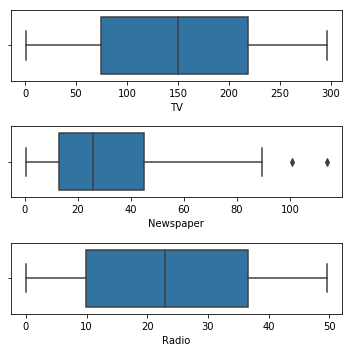

In [6]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()

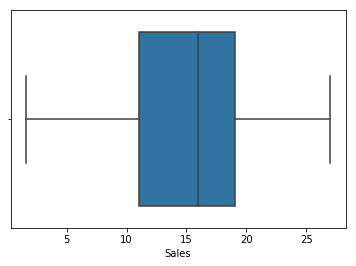

In [7]:
sns.boxplot(advertising['Sales'])
plt.show()

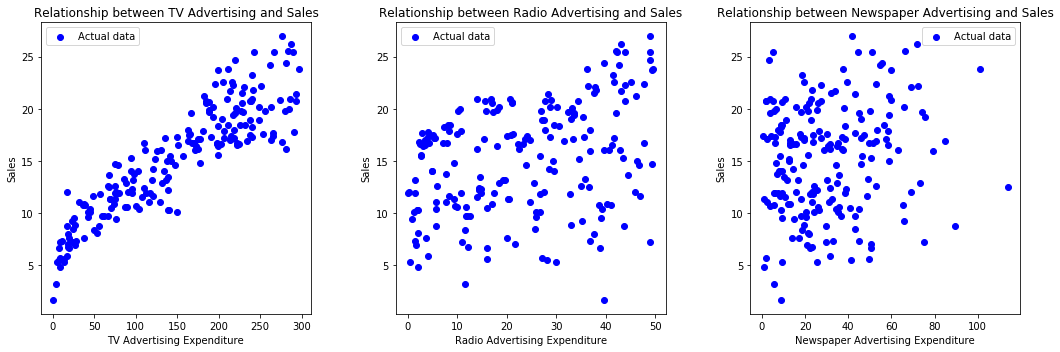

In [12]:
X = advertising[['TV', 'Radio', 'Newspaper']]
y = advertising['Sales']

# Visualize the Data
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, feature in enumerate(X.columns):
    axs[i].scatter(X[feature], y, c='b', label='Actual data')
    axs[i].set_xlabel(feature + ' Advertising Expenditure')
    axs[i].set_ylabel('Sales')
    axs[i].set_title('Relationship between ' + feature + ' Advertising and Sales')
    axs[i].legend()
plt.tight_layout()
plt.show()

# Training and Evaluation of data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Coefficient of Determination (R^2):", r2)

# Make Predictions (Testing the model)
new_advertising = [[100, 50, 25]]  
predicted_sales = model.predict(new_advertising)
print("Predicted Sales:", predicted_sales)

Mean Squared Error: 2.54162403622915
Coefficient of Determination (R^2): 0.9091484341849798
Predicted Sales: [15.43626592]


### Result Analysis

MSE: The mean squared error (MSE) is 2.54. This indicates that, on average, the predicted sales values are about 2.54 units away from the actual sales values.
R^2: The coefficient of determination (R^2) is 0.9091. This means that approximately 90.91% of the variation in sales can be explained by the advertising expenditures on TV, radio, and newspaper.
Predicted Sales: If we invest 100  in TV advertising, 50 in radio advertising, and 25 in newspaper advertising, we can expect to achieve approximately 15.44 units in sales. 

Overall, the model performs well, with a relatively low MSE and a high R^2, indicating that it accurately predicts sales based on advertising expenditure.